<a href="https://colab.research.google.com/github/Taiga10969/Learn-the-basics/blob/main/OCR/pytesseract_OCR_bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pytesseract を用いた OCR
pytesseract ライブラリを用いて画像 () を OCR を用いてテキストを検出する．

## 必要ライブラリ等のインストール

###```!apt-get install -qq tesseract-ocr```

オープンソースの光学文字認識（OCR）エンジン．画像内のテキストを読み取るために使用される．<br>

### ```!apt-get install -qq libtesseract-dev```

Tesseract OCRエンジンを開発およびビルドする際に必要なライブラリが含まれる．<br>

### ```!apt-get install -qq poppler-utils```

Popplerは、PDFドキュメントを操作するためのユーティリティ集であり、PDFのテキスト抽出などに使用されます。<br>

### ```!apt-get install -qq tesseract-ocr-eng```

Tesseractを使用して英語のテキストを読み取るために必要な言語データが含まれている．<br>
今回は，英語のテキストを読み取ることを前提にインストールしているが，日本語を読み取る場合は，`!apt-get install -qq tesseract-ocr-jpn`とする．

### ```!pip install -q pytesseract```

PythonでTesseract OCRエンジンを使いやすくラップしたライブラリであり，画像からテキストを抽出するために使用される．<br>

In [1]:
!apt-get install -qq tesseract-ocr
!apt-get install -qq libtesseract-dev
!apt-get install -qq poppler-utils
!apt-get install -qq tesseract-ocr-eng
!pip install -q pytesseract
!pip install -q matplotlib

Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120509 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-eng (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr-osd.
Preparing to unpack .../tesseract-ocr-osd_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-osd (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr.
Preparing to unpack .../tesseract-ocr_4.1.1-2.1build1_amd64.deb ...
Unpacking tesseract-ocr (4.1.1-2.1build1) ...
Setting up tesseract-ocr-eng (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-osd (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr (4.1.1-2.1build1) ...
Processing triggers for man-db (2.10.2-1) ...
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 120556 files and directories currently installed.)
Preparing to

## 必要ライブラリのインポート

In [2]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Sample: 1
論文の一部のong形式のデータを用いてテキスト情報を取得する．

****pre_text****
  

Attention Is All You Need

Ashish Vaswani* Noam Shazeer* Niki Parmar* Jakob Uszkoreit*
Google Brain Google Brain Google Research Google Research
avaswani@google.com noam@google.com nikip@google.com usz@google.com

Llion Jones* Aidan N. Gomez* t Lukasz Kaiser*
Google Research University of Toronto Google Brain
llion@google.com aidan@cs.toronto.edu lukaszkaiser@google.com

Illia Polosukhin* #
illia.polosukhin@gmail.com

Abstract

The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring significantly
le

(-0.5, 1249.5, 1019.5, -0.5)

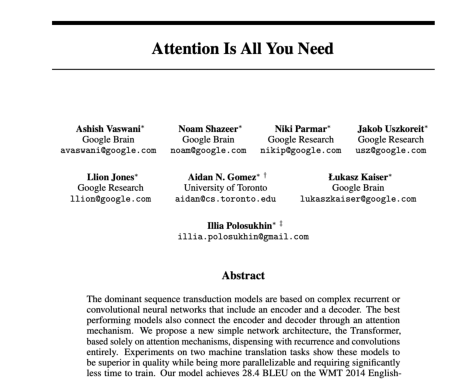

In [3]:
# 画像ファイルのパスを指定
image_path = '/content/sample_paper_text.png'
# 画像を読み込み
image = Image.open(image_path)

pre_text = pytesseract.image_to_string(image, lang='eng')  # 言語データに合わせて指定
print('****pre_text****\n', pre_text)

plt.imshow(image)
plt.axis('off')

## Sample: 2
論文中に含まれるchart図を入力した場合の挙動を確認する．<br>
※うまい具合に出力はできないことを確認．

****pre_text****
  

    

 

 

 

—
2
G
no
°
a
2
|
1 |
+ ce N oe
oO oO oO oO
yunoo jo Ayjiqeqoid Jo19}sod

 

 

 

0.0

 

 

0.6
0.4

2
0.0

yunoo jo Ayjiqeqoid J019}sod

15

10

10

count

count



(-0.5, 1866.5, 671.5, -0.5)

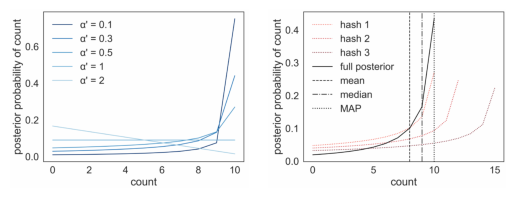

In [4]:
# 画像ファイルのパスを指定
image_path = '/content/sample_paper_figure1.png'
# 画像を読み込み
image = Image.open(image_path)

pre_text = pytesseract.image_to_string(image, lang='eng')  # 言語データに合わせて指定
print('****pre_text****\n', pre_text)

plt.imshow(image)
plt.axis('off')

## Sample3: Bounding Box の表示
OCR処理時に検出された領域検出情報を取得するには`image_to_data`または`image_to_boxes`メソッドを使用する必要がある．<br>
これにより，各テキスト領域のBounding Box情報や位置情報を取得することができる．

****result****
 {'level': [1, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 4, 5, 4, 5, 3, 4, 5, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 4, 5, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 

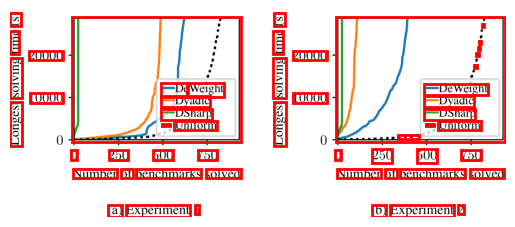

In [5]:
# 画像ファイルのパスを指定
image_path = '/content/sample_paper_figure2.png'
# 画像を読み込み
image = Image.open(image_path)

# OCRを実行してテキストと領域情報を抽出
result = pytesseract.image_to_data(image, lang='eng', output_type=pytesseract.Output.DICT)

print('****result****\n', result)

# 画像を表示
plt.imshow(image)
plt.axis('off')

# Bounding Boxを可視化して画像に重ねる
for i in range(len(result['text'])):
    if int(result['conf'][i]) > 0:  # Confidenceが0より大きいものだけ描画
        x, y, w, h = result['left'][i], result['top'][i], result['width'][i], result['height'][i]
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))

plt.show()

## +α
画像中にBounding Boxとその領域で検出されたテキストを同時に表示させる方法

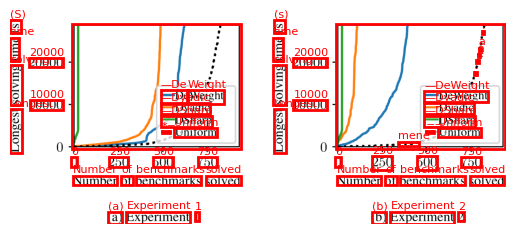

In [6]:
# 画像ファイルのパスを指定
image_path = '/content/sample_paper_figure2.png'

# 画像を読み込み
image = Image.open(image_path)

# OCRを実行してテキストと領域情報を抽出
result = pytesseract.image_to_data(image, lang='eng', output_type=pytesseract.Output.DICT)

# 画像を表示
plt.imshow(image)
plt.axis('off')

# Bounding Boxを可視化して画像に重ねる
for i in range(len(result['text'])):
    if int(result['conf'][i]) > 0:  # Confidenceが0より大きいものだけ描画
        x, y, w, h = result['left'][i], result['top'][i], result['width'][i], result['height'][i]
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
        text = result['text'][i]
        plt.text(x, y-10, text, color='red', fontsize=8)  # テキストを描画

plt.show()